In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

In [2]:
from itertools import chain

res_dir = os.path.join('results', 
                       'how_long_heuristic_is_better')

ns = list(range(1, 11 + 1))
families = ['euclidean', 'noise', 'truncated_urn', 'resampling']

res_dirs_wout_trials = {
    (n, family): os.path.join(res_dir, f'30x60_{n}', 'basin_hopping', family) for family in families for n in ns}


res_dirs_w_trials = {(n, family): list(sorted(name for name in os.listdir(res_dir_wout_trials) if os.path.isdir(os.path.join(res_dir_wout_trials, name)))) for (n, family), res_dir_wout_trials in res_dirs_wout_trials.items()}


In [3]:
res = []
drop_tail = True
for (n, family), trial_files in res_dirs_w_trials.items():
    if drop_tail:
        trial_files = trial_files[:-1]
    for trial_file in trial_files:
        with open(os.path.join(res_dirs_wout_trials[(n, family)], trial_file, 'new_heuristics_approvalwise_vectors.txt')) as f:
            lines = f.readlines()
            count = len(lines) - 1
            i_trial = int(trial_file[-1])
            res.append({'n': n, 'family': family, 'trial': i_trial, 'count': count})

df = pd.DataFrame(res)
df = df.groupby(['family', 'n']).agg({'count': ['mean', 'std']})

# df['count']['mean'] -= df['count'].index.get_level_values(1)
df

count          
                       mean       std
family        n                      
euclidean     1    1.000000  0.000000
              2    2.000000  0.000000
              3    2.000000  0.000000
              4    4.000000  0.000000
              5    7.250000  3.593976
              6    8.555556  4.216370
              7   10.555556  3.431877
              8   13.444444  4.639804
              9   13.777778  4.116363
              11  10.555556  2.788867
noise         1    2.333333  1.322876
              2    3.333333  1.581139
              3    4.444444  2.068279
              4    4.000000       NaN
              5    6.000000       NaN
              6   11.000000  1.414214
resampling    1    1.000000  0.000000
              2    2.111111  0.927961
              3    2.444444  0.527046
              4    6.111111  2.934469
              5    6.000000  1.581139
              6    9.000000  2.000000
truncated_urn 1    1.000000  0.000000
              2   11.888889  1.964971
              3   12.444444  1.509231
              4   14.000000  1.802776

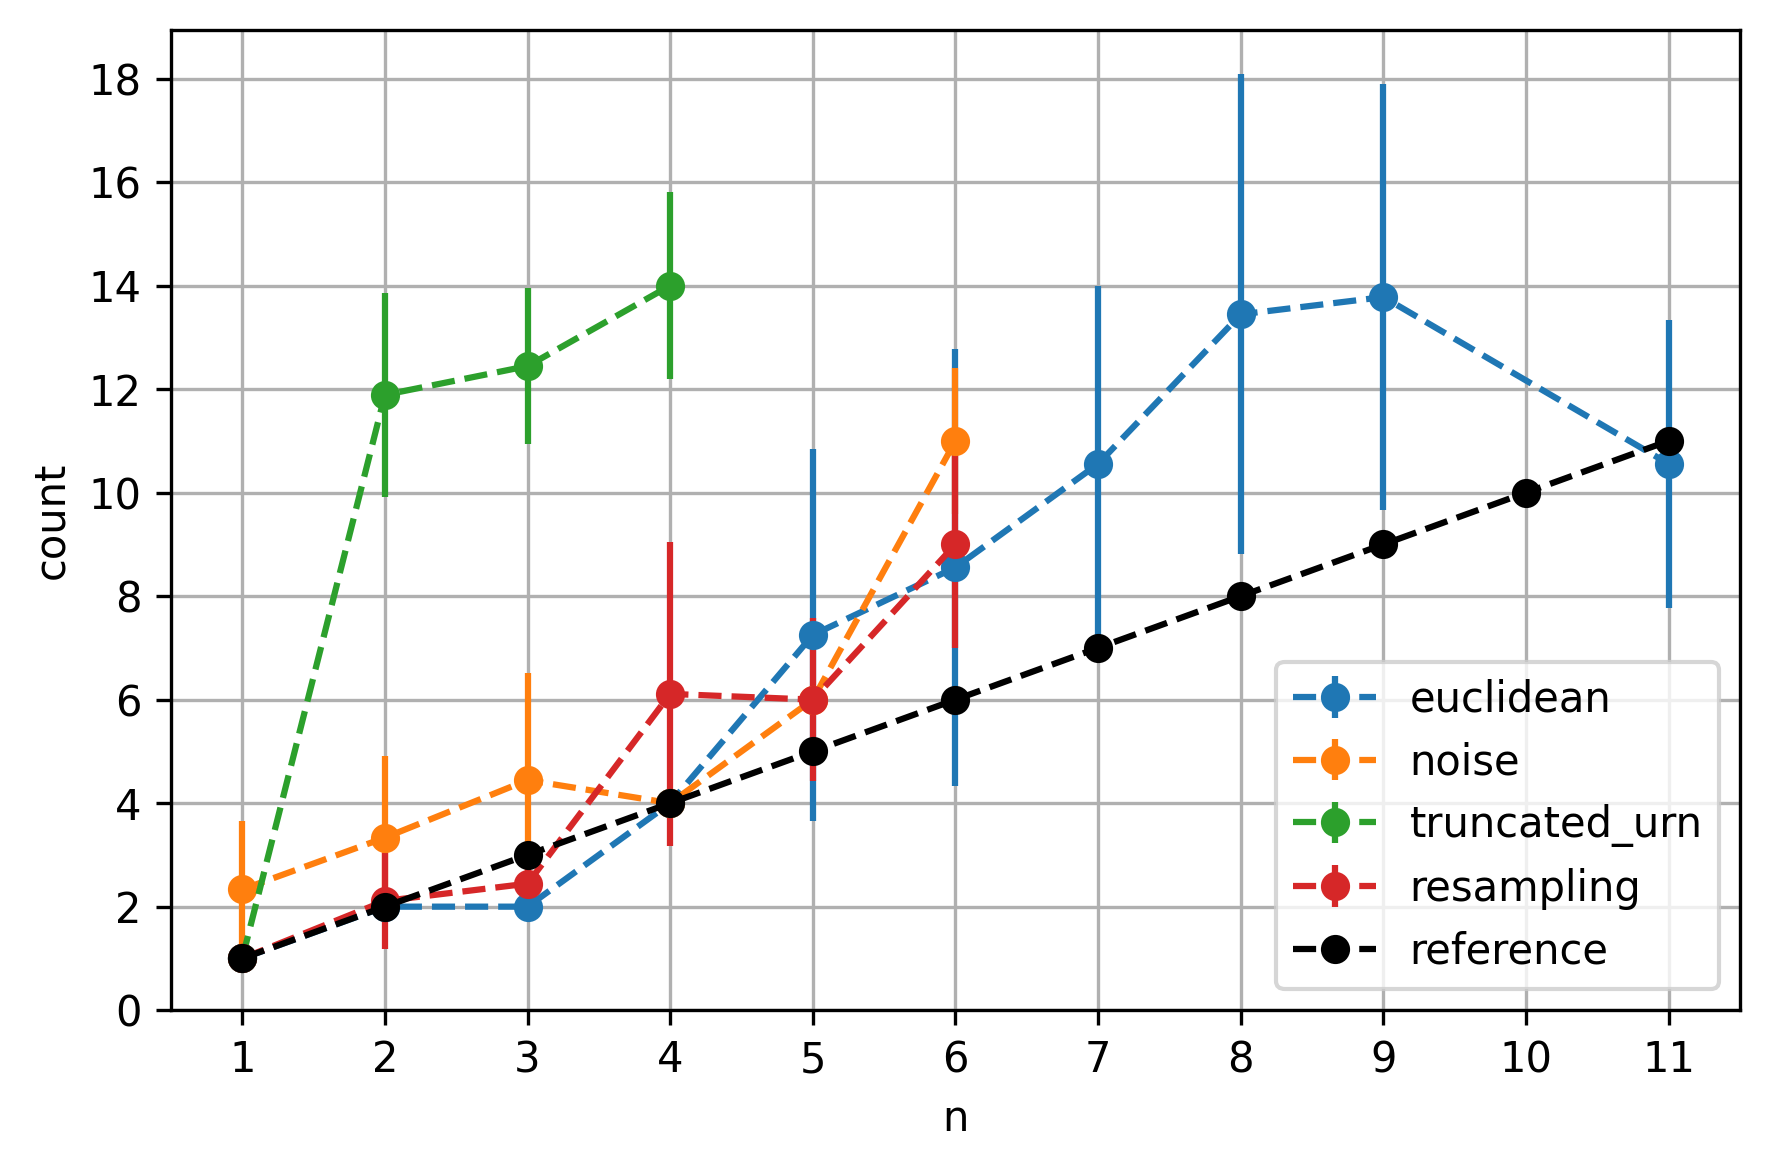

In [4]:
fig, ax = plt.subplots(dpi=300)

for family in families:
    df_family = df.loc[family]
    ax.errorbar(df_family.index, df_family['count']['mean'], yerr=df_family['count']['std'], label=family, fmt='--o')
    
reference_result = df['count'].index.get_level_values(1)
# ax.plot(ns, ns, color='black', linestyle='--', zorder=20, linewidth=2)    
ax.errorbar(ns, ns, label='reference', color='black', zorder=20, fmt='--o')    
    

ax.legend()
ax.set_xlabel('Number of reference elections')
ax.set_ylabel('Searched elections count')

ax.set_xticks(ns)
ax.set_yticks(list(range(0, 19, 2)))
ax.grid(True)


fig.tight_layout()